<a href="https://colab.research.google.com/github/Code-By-Pitt/Springboard/blob/main/Craft_a_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Only necessary to run this cell once
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

data = pd.read_csv("/content/gdrive/MyDrive/Springboard/Capstone2/Raw_Data/cleaned_daily_data.csv")

In [3]:
data.head()

,Day,campaign_label,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,dayName,DayofYear,Week_no,year,MonthName,Quarter,CPA,CTR,CPC,AOV,Quarter2
0,2019-01-01,Generic,17705,841317,13621.93,123.65,47208.75,676.0,56324.70,Tuesday,1,1,2019,January,1,110.165224,0.021044,0.769383,3.465643,Q1
1,2019-01-02,Generic,15741,778103,14037.76,131.54,53946.99,587.0,38713.52,Wednesday,2,1,2019,January,1,106.718565,0.020230,0.891796,3.842991,Q1
2,2019-01-03,Generic,6959,338800,4261.37,41.27,14742.38,299.0,19999.74,Thursday,3,1,2019,January,1,103.255876,0.020540,0.612354,3.459540,Q1
3,2019-01-04,Generic,8000,425764,5367.59,47.45,20522.77,360.0,22256.93,Friday,4,1,2019,January,1,113.120969,0.018790,0.670949,3.823461,Q1
4,2019-01-05,Generic,11422,697889,8417.39,70.62,24958.24,503.0,40467.47,Saturday,5,1,2019,January,1,119.192722,0.016366,0.736945,2.965081,Q1


In [33]:
campLabelData = data.groupby(['campaign_label','year'])[['Conversions','Conv. value','Cost']].sum().reset_index()
campLabelData

,campaign_label,year,Conversions,Conv. value,Cost
0,Generic,2019,16547.27,7455614.07,2070294.69
1,Generic,2020,13503.75,5403885.57,1131653.64
2,Generic,2021,4586.06,2355773.47,359286.10
3,Shopping,2019,4892.54,1875480.64,400361.77
4,Shopping,2020,31632.42,12029593.09,1278005.30
5,Shopping,2021,16224.28,6806314.78,690341.58


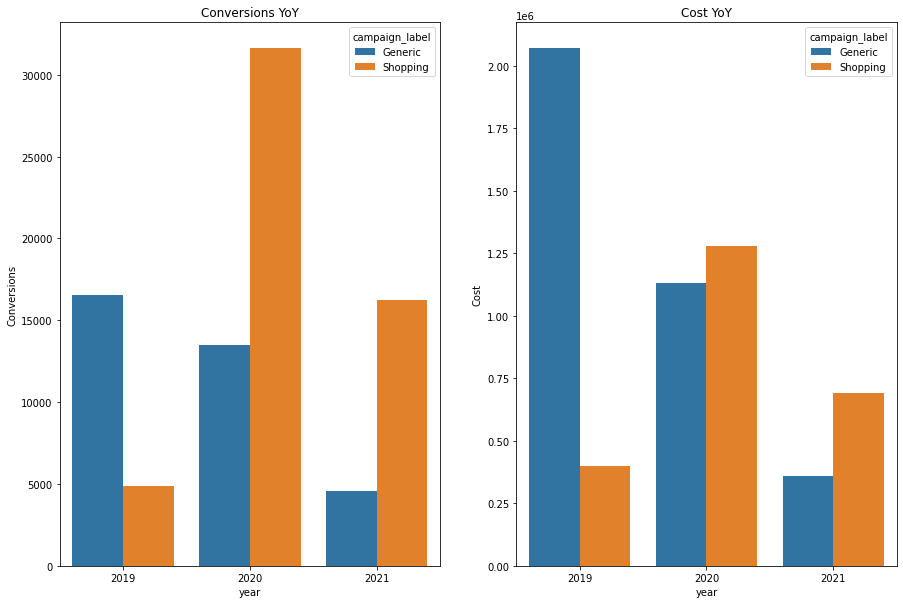

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
sns.barplot(x="year", y="Conversions", hue="campaign_label", data=campLabelData,ax=ax1)
ax1.set_title('Conversions YoY')
sns.barplot(x="year", y="Cost", hue="campaign_label", data=campLabelData, ax=ax2)
ax2.set_title('Cost YoY')
plt.subplots_adjust(hspace=100)

Text(0.5, 1.0, 'Cost MoM')

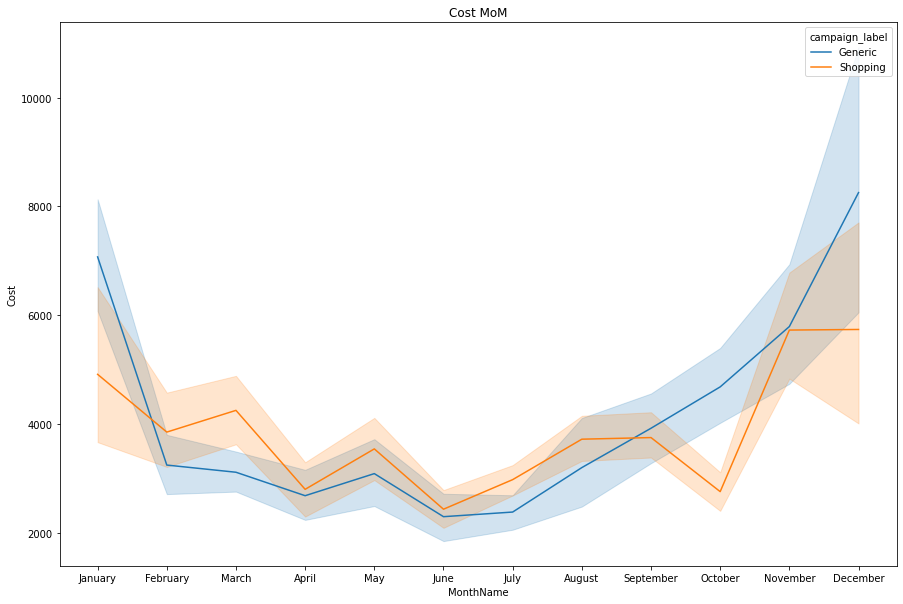

In [46]:
fig, (ax1) = plt.subplots(1, 1,figsize=(15,10))
sns.lineplot(data=data,x ='MonthName', hue="campaign_label", y="Cost",ax=ax1)
ax1.set_title('Cost MoM')

Text(0.5, 1.0, 'Cost vs Conversions')

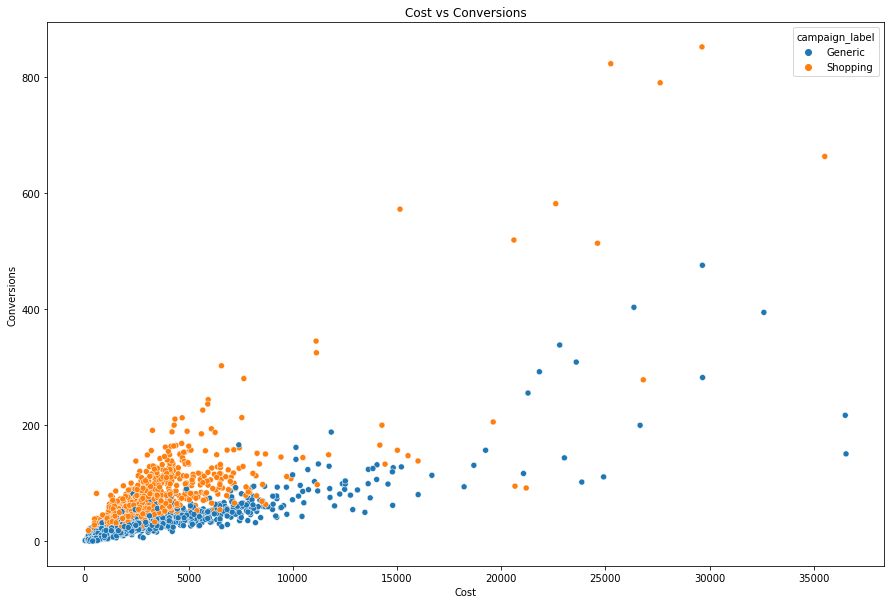

In [47]:
fig, (ax1) = plt.subplots(1, 1,figsize=(15,10))
sns.scatterplot(data=data, x="Cost", y="Conversions", hue="campaign_label")
ax1.set_title('Cost vs Conversions')